/tmp/ipykernel_8955/4097211817.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).explode(index_parts=True).reset_index(drop=True)


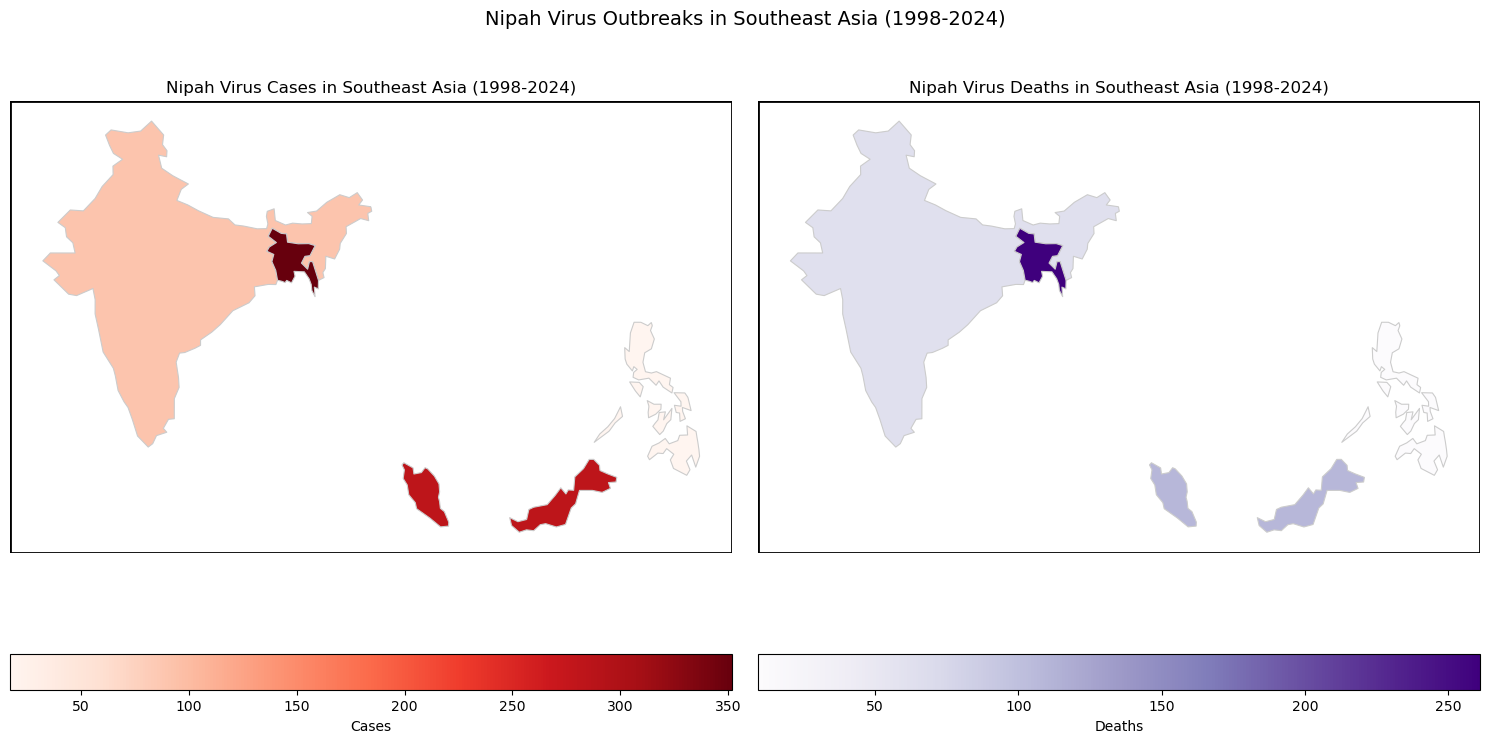

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the world map shapefile and handle multi-part geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).explode(index_parts=True).reset_index(drop=True)

# Filter the map to focus on Southeast Asia countries affected by NiV
countries_of_interest = ["Malaysia", "Singapore", "Bangladesh", "India", "Philippines"]
southeast_asia = world[world['name'].isin(countries_of_interest)]

# Data for Nipah virus cases and deaths
data = {
    "country": ["Malaysia", "Singapore", "Bangladesh", "India", "Philippines"],
    "cases": [283, 11, 352, 91, 17],
    "deaths": [109, 1, 261, 63, 9]
}
df = pd.DataFrame(data)

# Merge data with geometry
southeast_asia = southeast_asia.merge(df, left_on="name", right_on="country")

# Create side-by-side plots for cases and deaths
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot for Nipah Virus Cases
southeast_asia.plot(
    column='cases', 
    cmap='Reds', 
    linewidth=0.8, 
    ax=ax[0], 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "Cases", 'orientation': "horizontal"}
)
ax[0].set_title("Nipah Virus Cases in Southeast Asia (1998-2024)")
ax[0].axis('off')

# Draw a border around the first subplot
rect1 = patches.Rectangle((0, 0), 1, 1, transform=ax[0].transAxes, 
                          fc="none", ec="black", lw=2)
ax[0].add_patch(rect1)

# Plot for Nipah Virus Deaths
southeast_asia.plot(
    column='deaths', 
    cmap='Purples', 
    linewidth=0.8, 
    ax=ax[1], 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "Deaths", 'orientation': "horizontal"}
)
ax[1].set_title("Nipah Virus Deaths in Southeast Asia (1998-2024)")
ax[1].axis('off')

# Draw a border around the second subplot
rect2 = patches.Rectangle((0, 0), 1, 1, transform=ax[1].transAxes, 
                          fc="none", ec="black", lw=2)
ax[1].add_patch(rect2)

# Add a main title for the whole figure
plt.suptitle("Nipah Virus Outbreaks in Southeast Asia (1998-2024)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title better

# # Save the plot as a EPS file with high resolution
# plt.savefig("imagesFinal/nipah_virus_outbreaks.eps", dpi=300)

# # Save the plot as a PNG file with high resolution
# plt.savefig("imagesFinal/nipah_virus_outbreaks.png", dpi=300)

# Display the plot
plt.show()

In [3]:
df

,country,cases,deaths
0,Malaysia,283,109
1,Singapore,11,1
2,Bangladesh,352,261
3,India,91,63
4,Philippines,17,9
